In [1]:
import os
import glob 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np

In [2]:
image_dir_training = "images/training/"
image_dir_test = "images/test/"

## Step 1: Load the datasets and visualize


In [3]:
def load_dataset(image_dir):
    im_list = []
    image_types = ["Good", "Bad"]
    for im_type in image_types:
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):
 
            im = mpimg.imread(file)
            if not im is None:
                im_list.append((im, im_type))
    
    return im_list

In [4]:
IMAGE_LIST = load_dataset(image_dir_training)


## Step 2: Preprocess the data input images.



In [5]:
def standardize_input(image):
    
    standard_im = cv2.resize(image, (1100, 600))
    
    return standard_im

In [6]:
def encode(label):
    numerical_val = 0
    if(label == 'Good'):
        numerical_val = 1
    
    return numerical_val

In [7]:
def preprocess(image_list):
    
    standard_list = []
    
    for item in image_list:
        image = item[0]
        label = item[1]
        
        standardized_im = standardize_input(image)
        binary_label = encode(label)
        
        standard_list.append((standardized_im, binary_label))
    
    return standard_list

In [8]:
STANDARDIZED_LIST = preprocess(IMAGE_LIST)

Shape: (600, 1100, 3)
Label [1 = Good, 0 = Bad]: 1


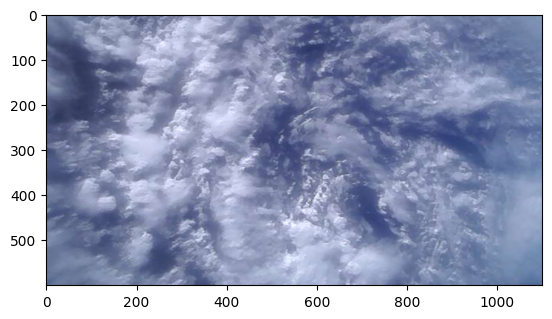

In [9]:
image_num = 9
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = Good, 0 = Bad]: " + str(selected_label))


## Step 3: Feature Extraction



In [10]:
def avg_brightness(rgb_image):
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    sum_brightness = np.sum(hsv[:,:,2])
    area = 600*1100.0  # pixels

    avg = sum_brightness/area
    
    return avg

Avg brightness: 160.92722272727272


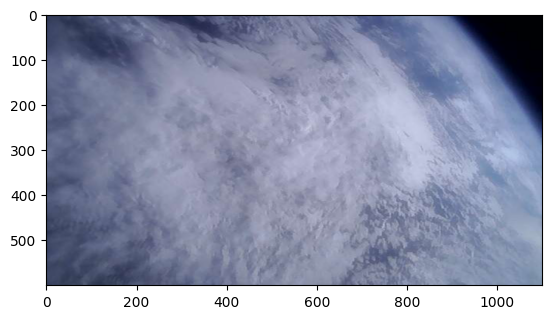

In [11]:
image_num = 10
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)

## Step 4: Build the classifier



In [12]:
def estimate_label(rgb_image, threshold):
    
    avg = avg_brightness(rgb_image)
    predicted_label = 0
    #threshold = 120
    if(avg > threshold):
        predicted_label = 1
    
    return predicted_label    
    

## Step 5: Evaluate the Classifier and Optimize




In [13]:
TEST_IMAGE_LIST = load_dataset(image_dir_test)

STANDARDIZED_TEST_LIST = preprocess(TEST_IMAGE_LIST)

random.shuffle(STANDARDIZED_TEST_LIST)

In [14]:
def get_misclassified_images(test_images, threshold):
    misclassified_images_labels = []
    for image in test_images:

        im = image[0]
        true_label = image[1]

        predicted_label = estimate_label(im, threshold)

        if(predicted_label != true_label):
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    return misclassified_images_labels

In [15]:
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST, threshold=99)

total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

Accuracy: 0.6666666666666666
Number of misclassified images = 10 out of 30



## Conclusion

We received an accuracy of **66.66%** by using only one feature extraction, i.e the average brightness of the image. We could work more on this, for example features that involve the other 2 Hue and Saturation channels to extract more features.



In [16]:
def estimate_label(rgb_image, threshold):
    avg = avg_brightness(rgb_image)
    predicted_label = 0
    #threshold = 120
    if(avg > threshold):
        predicted_label = 1
    
    return predicted_label    
    

In [17]:
for image in STANDARDIZED_TEST_LIST:

        im = image[0]
        predicted_label = estimate_label(im, 99)
        
        print("predicted Label", predicted_label)


predicted Label 1
predicted Label 1
predicted Label 0
predicted Label 1
predicted Label 1
predicted Label 1
predicted Label 1
predicted Label 1
predicted Label 1
predicted Label 1
predicted Label 1
predicted Label 1
predicted Label 1
predicted Label 1
predicted Label 1
predicted Label 1
predicted Label 0
predicted Label 1
predicted Label 1
predicted Label 1
predicted Label 1
predicted Label 1
predicted Label 1
predicted Label 1
predicted Label 1
predicted Label 1
predicted Label 1
predicted Label 1
predicted Label 1
predicted Label 1
